###  <span style='font-family:Georgia'> <span style='color:Blue'> <h1><center>ANALYSIS OF THE RELATIONSHIP BETWEEN ENVIRONMENTAL DEGREDATION AND ECONOMIC GROWTH</center></h1>

## <span style='font-family:Georgia'> <span style='color: brown'> Table of Contents

<span style='font-family:Georgia'>Part 1. **Introduction to Kuznets Curve**

<span style='font-family:Georgia'>Part 2. **Dataset Description**

<span style='font-family:Georgia'>Part 3.  **Standardization and Merging of the Data**

<span style='font-family:Georgia'>Part 4. **Summary Statistics**

<span style='font-family:Georgia'>Part 5. **Regression Analysis**

<span style='font-family:Georgia'>Part 6. **Results**

<span style='font-family:Georgia'>Part 7. **Conclusion**

#### <span style='font-family:Georgia'> <span style='color:Blue'> <h1><center>PART I - INTRODUCTION TO ENVIRONMENTAL KUZNETS CURVE</center></h1> 

## <span style='font-family:Georgia'> <span style='color:Brown'> INTRODUCTION 


 <span style='font-family:Georgia'>Climate activism has emerged as the frontrunner amongst the urgent problems facing our society in the 21st century. The trade-off between economic development and environmental degradation has long been a point of contention in economic literature but has become significantly more important in the last few decades. 

 <span style='font-family:Georgia'>For a long time, economists have been conducting extensive research aimed at understanding the effect of economic growth of a country on its environmental quality. One such theoretical model is the Environmental Kuznets Curve which suggests that economic development initially leads to a deterioration in the environment, but after reaching a certain level of economic growth, the society begins to improve its relationship with the environment and levels of environmental degradation start to decline.

 <span style='font-family:Georgia'>Kuznets Curve as an inverted U-shape relationship between economic growth and economic inequality was first proposed by Simon Kuznets (1955). In essence, EKC proposes that as a country embarks on its development path, pollution increases following the rise of income, but increasing income would ultimately reduce environmental pollution by providing motivations to improve environmental performance. We can then represent our theoretical model as follows - 
Environmental degradation = f(economic growth, renewable energy consumption, non-renewable energy consumption)


## <span style='font-family:Georgia'> <span style='color:Brown'> OBJECTIVE AND SCOPE
 <span style='font-family:Georgia'>We will be checking for the validity of the Environmental Kuznets Curve within the US States. For the purposes of our study, we will be analyzing whether the environmental degradation in a state initially increased and then decreased as the economic growth increased during the scope of this study. We will be considering 50 states plus the District of Columbia and Puerto Rico over the scope of 10 years, from 2005 to 2015, and we consider quarterly data as the frequency of data.

#### <span style='font-family:Georgia'> <span style='color:Blue'> <h1><center>PART II - DATASET DESCRIPTION</center></h1>  

## <span style='font-family:Georgia'> <span style='color:Brown'> DATA SOURCE 
 <span style='font-family:Georgia'>In order to run the regression analysis to observe the relationship, we use raw data from three main sources -
 <span style='font-family:Georgia'>1. US Bureau of Economic Analysis (GDP and Population)
 <span style='font-family:Georgia'>2. Environmental Protection Agency (Carbon Monoxide, Nitrogen Monoxide and Ozone levels)
 <span style='font-family:Georgia'>3. US Energy Information Administration (Renewable and Nonrenewable Energies)

 <span style='font-family:Georgia'>Most of the data on Carbon Monoxide, Nitrogen Monoxide and Ozone had daily observations over the 10 year period so we had to clean the data (using groupby, loc, merge, sortvalues, pivot tables etc.) in order to generate a csv file. The data clean up is submitted as a seperate notebook for anyone who is interested but is not included here to maintain brevity of our economic analysis.

 <span style='font-family:Georgia'> As we can see the observations are not to scale since we cannot effectively use GDP (measured in US$) alongside CO/NO/O3 levels (measured in parts per million). Thus, before providing summary statistics, trends or regression analysis, we must standardize the data.
 


## <span style='font-family:Georgia'> <span style='color:Brown'>VARIABLES AND PROXIES

 <span style='font-family:Georgia'>For our dependent variable (y) we consider environmental degradation in each of the 52 states at a given time. The three proxies used for this are CO levels, NO levels and O3 levels (in parts per million). The data for this proxy was collected at the city level on a daily basis. For our dataset, we considered the most populous city in each state and took the observations at the beginning of every quarter between 2005 and 2015.

 <span style='font-family:Georgia'>For our first independent variable (x1) we consider economic growth of each state and we use GDP as a proxy. Our second independent variable (x2) is renewable energy used to generate electricity in megawatt hours (Mwh). We consider multiple proxies for renewable energy - Geothermal, Hydroelectric Conventional, Solar Thermal and Photovoltaic, Wind, and Wood and Wood Derived Fuels. The data set included Other Biomass and Other Gases but we decided not to include them as regressors largely because of the fact that they form a very small percentage of energy sources when compared to hydroelectric energy or coal for instance. Our third independent variable (x3)  is non-renewable energy which is used to generate electricity in megawatt hours (Mwh). We again consider multiple proxies for this variable - Coal, Natural Gas, Nuclear, and Petroleum. 


#### <span style='font-family:Georgia'> <span style='color:Blue'> <h1><center>PART III - STANDARDIZATION AND MERGING OF DATA</center></h1> 

## <span style='font-family:Georgia'> <span style='color:Brown'>MERGING

In [62]:
Ren = pd.read_csv('C:/Users/Aashi Yadav/Desktop/REN.csv')
O = pd.read_csv('C:/Users/Aashi Yadav/Desktop/Ozonedata.csv')
NO = pd.read_csv('C:/Users/Aashi Yadav/Desktop/NO2.csv')
CO = pd.read_csv('C:/Users/Aashi Yadav/Desktop/CO.csv')
Pop = pd.read_csv('C:/Users/Aashi Yadav/Desktop/PPP.csv')

In [63]:
Ren = Ren.drop(['Unnamed: 0'],axis=1)
O = O.drop(['Unnamed: 0'],axis=1)
CO = CO.drop(['Unnamed: 0'],axis=1)
NO = NO.drop(['Unnamed: 0'],axis=1)

In [64]:
Pop[['Year','Quarter']] = Pop.Year.str.split(":",expand=True)
Pop

,State,Year,Population,GDP,Quarter
0,Alabama,2005,4109328,179355.5,Q1
1,Alabama,2005,4140381,181373.0,Q2
2,Alabama,2005,4171669,181292.6,Q3
3,Alabama,2005,4203192,183522.6,Q4
4,Alabama,2006,4234955,183884.5,Q1
...,...,...,...,...,...
2195,Wyoming,2014,583953,39519.5,Q4
2196,Wyoming,2015,584568,40246.7,Q1
2197,Wyoming,2015,585262,39283.1,Q2
2198,Wyoming,2015,585584,39871.3,Q3


In [65]:
Ren[['Year','Quarter']] = Ren.Quarter.str.split("Q",expand=True)

In [66]:
Pop['Year']=pd.to_numeric(Pop['Year'])
Pop.dtypes

State          object
Year            int64
Population      int64
GDP           float64
Quarter        object
dtype: object

In [67]:
Pop[['new','Quarter']] = Pop.Quarter.str.split("Q",expand=True)
Pop = Pop.drop(['new'],axis=1)

In [68]:
Pop['Quarter']=pd.to_numeric(Pop['Quarter'])

In [69]:
merged1 = pd.merge(O,Pop,left_on=['State','Year','Quarter'],right_on=['State','Year','Quarter'],how='outer')

In [70]:
merged2 = pd.merge(CO,NO,left_on=['State','Year','Quarter'],right_on=['State','Year','Quarter'],how='outer')

In [71]:
merged3 = pd.merge(merged1,merged2,left_on=['State','Year','Quarter'],right_on=['State','Year','Quarter'],how='outer')
merged3

,State,Year,Quarter,Ozone,Population,GDP,CO,NO
0,Alabama,2005,1,0.021703,4109328.0,179355.5,0.709411,5.22948
1,Alabama,2005,2,0.028811,4140381.0,181373.0,0.599608,NaN
2,Alabama,2005,3,0.022241,4171669.0,181292.6,0.585257,NaN
3,Alabama,2005,4,0.019101,4203192.0,183522.6,0.880804,NaN
4,Alabama,2006,1,0.022260,4234955.0,183884.5,0.865968,NaN
...,...,...,...,...,...,...,...,...
2283,West Virginia,2007,1,NaN,1692355.0,66029.5,0.326363,NaN
2284,West Virginia,2008,1,NaN,1744092.0,66702.0,0.381412,NaN
2285,West Virginia,2010,1,NaN,1852359.0,66597.9,0.377127,NaN
2286,West Virginia,2011,1,NaN,1855547.0,68232.4,0.359932,NaN


In [72]:
Ren['Quarter']=pd.to_numeric(Ren['Quarter'])
Ren['Year']=pd.to_numeric(Ren['Year'])
Ren.columns

Index(['State', 'Quarter', 'Coal', 'Geothermal', 'Hydroelectric Conventional',
       'Natural Gas', 'Nuclear', 'Other', 'Other Biomass', 'Other Gases',
       'Petroleum', 'Pumped Storage', 'Solar Thermal and Photovoltaic', 'Wind',
       'Wood and Wood Derived Fuels', 'Year'],
      dtype='object')

In [74]:
merged_final = pd.merge(merged3,Ren,left_on=['State','Year','Quarter'],right_on=['State','Year','Quarter'],how='outer')

In [75]:
merged_final.to_excel('C:/Users/Aashi Yadav/Desktop/Final.xlsx')

## <span style='font-family:Georgia'> <span style='color:Brown'>STANDARDIZATION

In [126]:
import pandas as pd
import numpy as np
Final = pd.read_excel('C:/Users/Aashi Yadav/Desktop/Final.xlsx')

In [415]:
data=Final.drop(['Unnamed: 0','Other', 'Other Biomass', 'Other Gases','Pumped Storage'],axis=1)
data.columns

Index(['State', 'Year', 'Quarter', 'Ozone', 'Population', 'GDP', 'CO', 'NO',
       'Coal', 'Geothermal', 'Hydroelectric Conventional', 'Natural Gas',
       'Nuclear', 'Petroleum', 'Solar Thermal and Photovoltaic', 'Wind',
       'Wood and Wood Derived Fuels'],
      dtype='object')

In [419]:
from sklearn import preprocessing
x = Final[['Ozone', 'Population', 'GDP', 'CO', 'NO',
       'Coal', 'Geothermal', 'Hydroelectric Conventional', 'Natural Gas',
       'Nuclear', 'Petroleum', 'Solar Thermal and Photovoltaic', 'Wind',
       'Wood and Wood Derived Fuels']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_new = pd.DataFrame(x_scaled)

In [424]:
results = pd.concat([data, data_new], join='outer', axis=1)
results = results.drop(['Ozone', 'Population', 'GDP', 'CO', 'NO',
       'Coal', 'Geothermal', 'Hydroelectric Conventional', 'Natural Gas',
       'Nuclear', 'Petroleum', 'Solar Thermal and Photovoltaic', 'Wind',
       'Wood and Wood Derived Fuels'],axis=1)
results.columns = ['State', 'Year', 'Quarter', 'Ozone', 'Population', 'GDP', 
                   'CO', 'NO','Coal', 'Geothermal', 'Hydroelectric Conventional',
                   'Natural Gas','Nuclear', 'Petroleum', 'Solar Thermal and Photovoltaic',
                   'Wind','Wood and Wood Derived Fuels']
merged_final.to_excel('C:/Users/Aashi Yadav/Desktop/Final_last.xlsx')

#### <span style='font-family:Georgia'> <span style='color:Blue'> <h1><center>PART IV - SUMMARY STATISTICS</center></h1> 

 <span style='font-family:Georgia'>We conduct some preliminary analysis to see the trends in CO, NO, O3 levels over the 10 year period and we then try to map these trends with respect to population, type of energy used to generate electricity (both renewable and non-renewable).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
Final = pd.read_excel('C:/Users/Aashi Yadav/Desktop/Final_last.xlsx')

## <span style='font-family:Georgia'> <span style='color:Brown'> COMPARISON OF POLLUTION IN 2005 AND 2015

In [81]:
df=Final.drop(['Unnamed: 0','Population', 'GDP',
       'Coal', 'Geothermal', 'Hydroelectric Conventional',
       'Natural Gas', 'Nuclear','Petroleum', 'Solar Thermal and Photovoltaic',
        'Wind','Wood and Wood Derived Fuels'],axis=1)

In [82]:
results1 = df.loc[df['Year']==2005]
results1 = results1.loc[df['Quarter']==2]
results2 = df.loc[df['Year']==2015]
results2 = results2.loc[df['Quarter']==2]

In [83]:
results1 = results1.set_index('State')
results1 = results1.drop(['Year','Quarter'],axis=1)

In [84]:
results2 = results2.set_index('State')
results2 = results2.drop(['Year','Quarter'],axis=1)

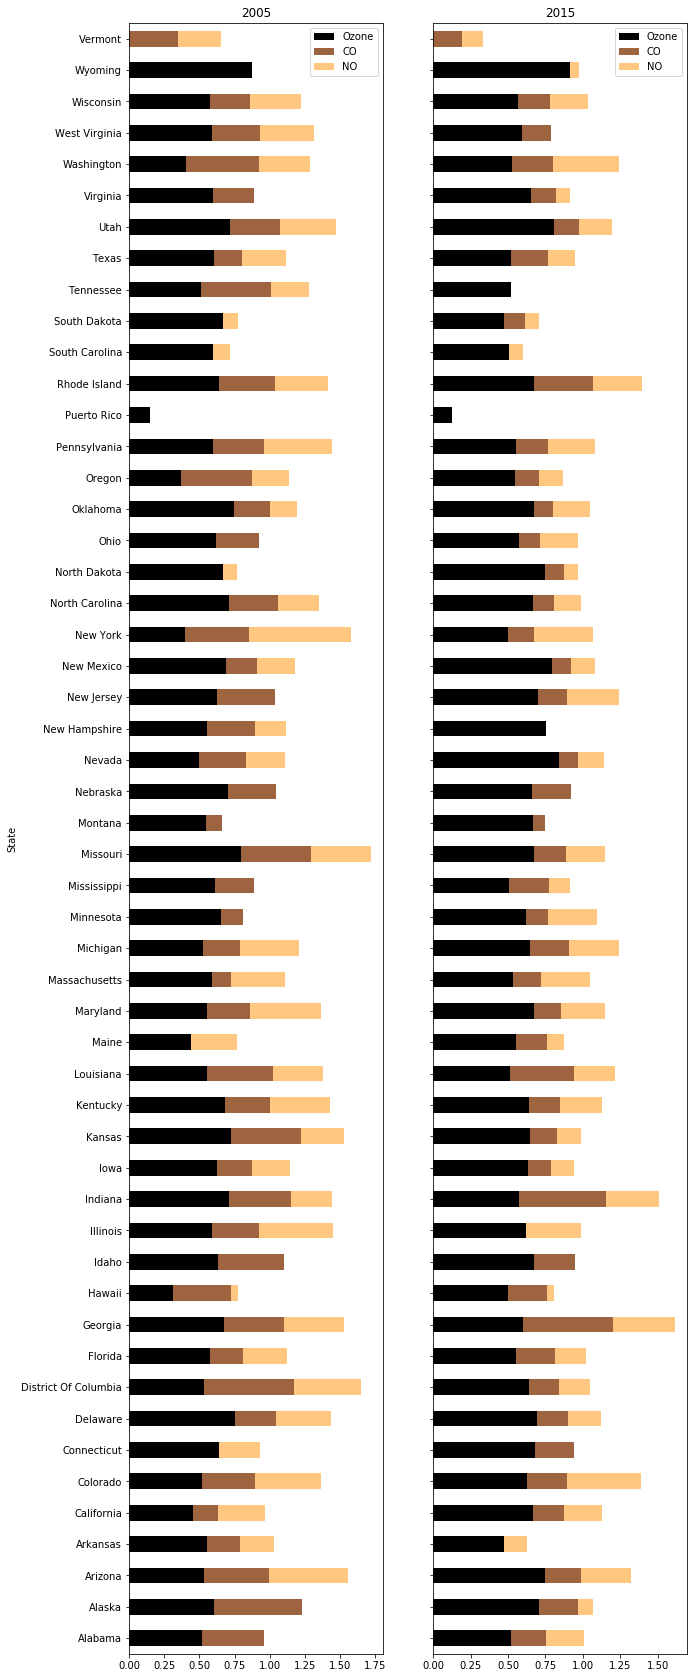

In [27]:
fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True)
results1.plot.barh(ax=ax[0],stacked=True,figsize=(10,30),title='2005',cmap='copper')
results2.plot.barh(ax=ax[1],stacked=True,figsize=(10,30),title='2015',cmap='copper')

####  <span style='font-family:Georgia'>The graph above shows the differences in the levels of CO,NO and Ozone between 2005 and 2015. A general trend can be observed:
 <span style='font-family:Georgia'>-Ozone levels have increased in most states

 <span style='font-family:Georgia'>-CO levels have rediced in most states

 <span style='font-family:Georgia'>-NO levels are mostly the same

## <span style='font-family:Georgia'> <span style='color:Brown'> RENEWABLE AND NON-RENEWABLE ENERGY BY STATE IN 2015

In [88]:
df1 = Final.drop(['Unnamed: 0', 'Ozone', 'Population', 'GDP',
       'CO', 'NO'],axis=1)

In [89]:
df1 = df1.loc[df1['Year']==2015]
df1 = df1.loc[df1['Quarter']==4]
df1 = df1.drop(['Year','Quarter'],axis=1)
df1 = df1.reset_index()
df1 = df1.drop(['index'],axis=1)

In [90]:
#Ren - Geothermal, Hydro, Solar, Wind, Wood
#Non Ren - Coal, Natural Gas, Nuclear, Petroleum

In [91]:
df1.columns

Index(['State', 'Coal', 'Geothermal', 'Hydroelectric Conventional',
       'Natural Gas', 'Nuclear', 'Petroleum', 'Solar Thermal and Photovoltaic',
       'Wind', 'Wood and Wood Derived Fuels'],
      dtype='object')

In [92]:
df_nonren = df1.drop(['Geothermal', 'Hydroelectric Conventional','Solar Thermal and Photovoltaic',
       'Wind', 'Wood and Wood Derived Fuels'],axis=1)
df_ren = df1.drop(['Coal','Natural Gas', 'Nuclear', 'Petroleum'],axis=1)

In [93]:
df_nonren = df_nonren.set_index('State')
df_ren = df_ren.set_index('State')
df_nonren = df_nonren.fillna(0)
df_ren = df_ren.fillna(0)

Text(0.5, 1, 'Usage of renewable energy by state in 2015')

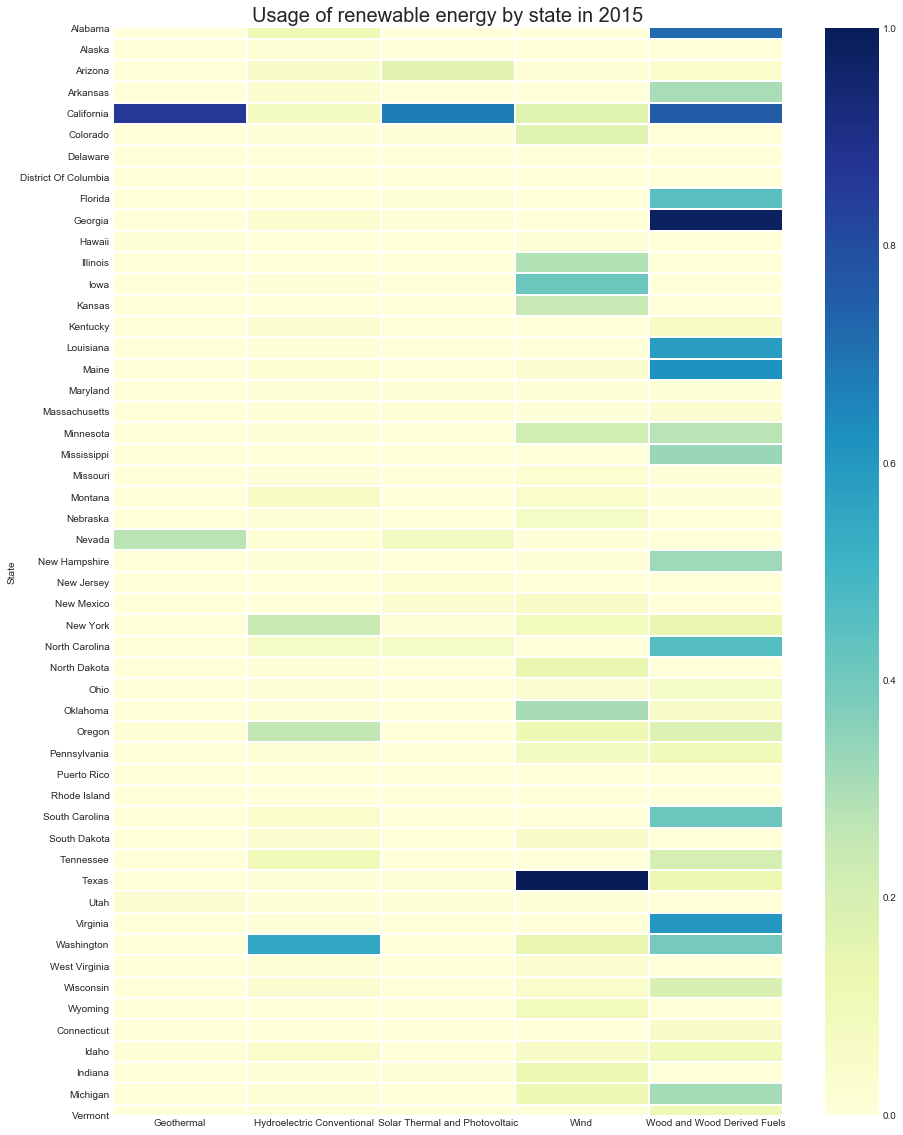

In [223]:
fig,ax = plt.subplots(figsize=(15,20))         
sns.heatmap(df_ren, linewidths=1, ax=ax,cmap="YlGnBu")
ax.set_title('Usage of renewable energy by state in 2015',fontsize=20)

## <span style='font-family:Georgia'>Highest concentration of renewable energy by state :

#### <span style='font-family:Georgia'>Geothermal - Nevada and California. 

#### <span style='font-family:Georgia'>Hydroelectric Conventional - Washington, Oregon, New York. 

#### <span style='font-family:Georgia'>Solar Thermal and Photovaltic - California and Arizona

#### <span style='font-family:Georgia'>Wind - Texas, Illinois, Iowa and Oklahoma

#### <span style='font-family:Georgia'>Wood - Georgia, California and Alabama. 

##### <span style='font-family:Georgia'>(Can be seen very clearly by the darker hilighted parts in the heatmap above.)

Text(0.5, 1, 'Usage of non-renewable energy by state in 2015')

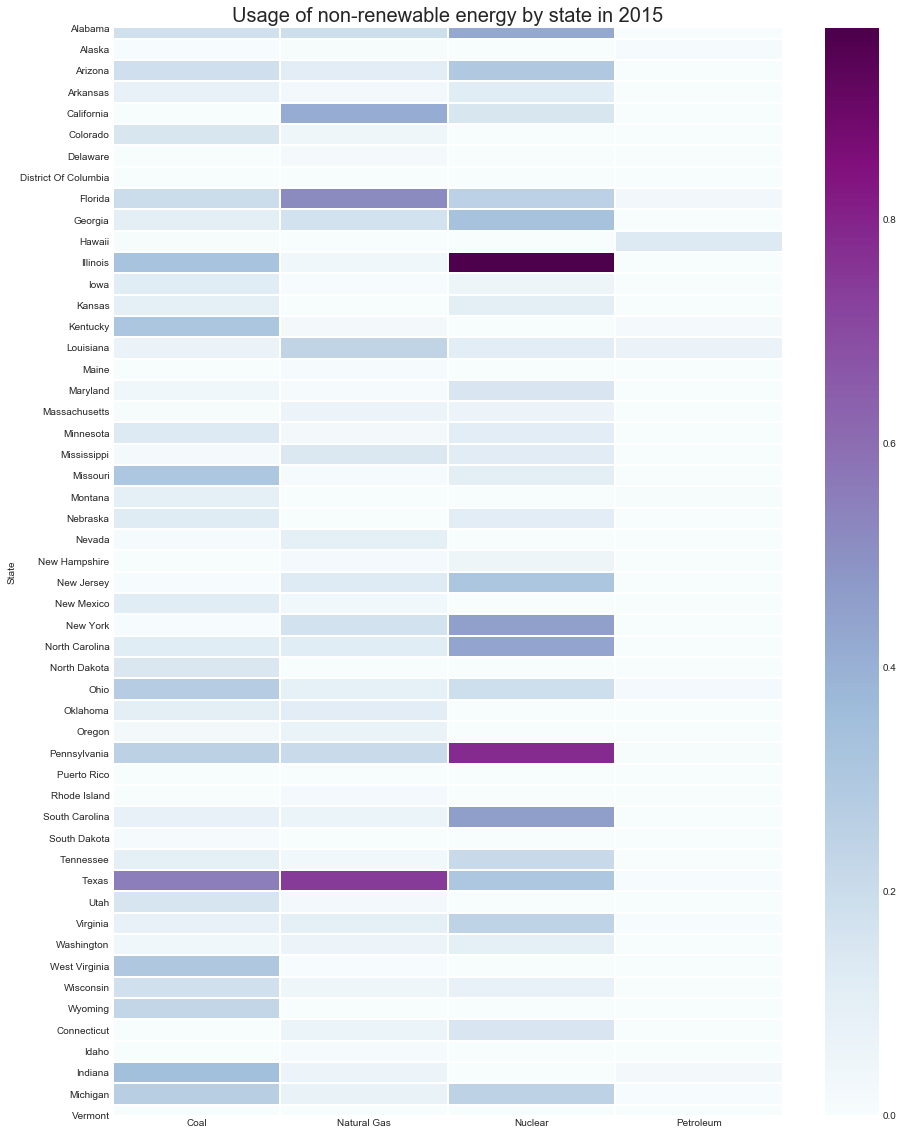

In [224]:
fig,ax = plt.subplots(figsize=(15,20))         
sns.heatmap(df_nonren, linewidths=1, ax=ax,cmap="BuPu")
ax.set_title('Usage of non-renewable energy by state in 2015',fontsize=20)

## <span style='font-family:Georgia'> Highest concentration of non-renewable energy by state :

#### <span style='font-family:Georgia'>Coal - Texas, West Virginia and Indiana. 

#### <span style='font-family:Georgia'>Natural Gas - Texas, Florida and California. 

#### <span style='font-family:Georgia'>Nuclear - Pennsylvania, New York and Illinois. 

#### <span style='font-family:Georgia'>Petroleum - Hawaii and Louisianna. 

##### <span style='font-family:Georgia'>(Can be seen very clearly by the darker hilighted parts in the heatmap above.)

## <span style='font-family:Georgia'> <span style='color:Brown'>  POLLUTION IN 5 MAJOR STATES OVER TIME

In [3]:
data = Final
Final.columns

Index(['Unnamed: 0', 'State', 'Year', 'Quarter', 'Ozone', 'Population', 'GDP',
       'CO', 'NO', 'Coal', 'Geothermal', 'Hydroelectric Conventional',
       'Natural Gas', 'Nuclear', 'Petroleum', 'Solar Thermal and Photovoltaic',
       'Wind', 'Wood and Wood Derived Fuels'],
      dtype='object')

In [4]:
data = data.loc[data['Quarter']==4]
data_NY = data.loc[data['State']=='New York']
data_Cal = data.loc[data['State']=='California'] 
data_Tex = data.loc[data['State']=='Texas'] 
data_Flo = data.loc[data['State']=='Florida'] 
data_Penn = data.loc[data['State']=='Pennsylvania'] 

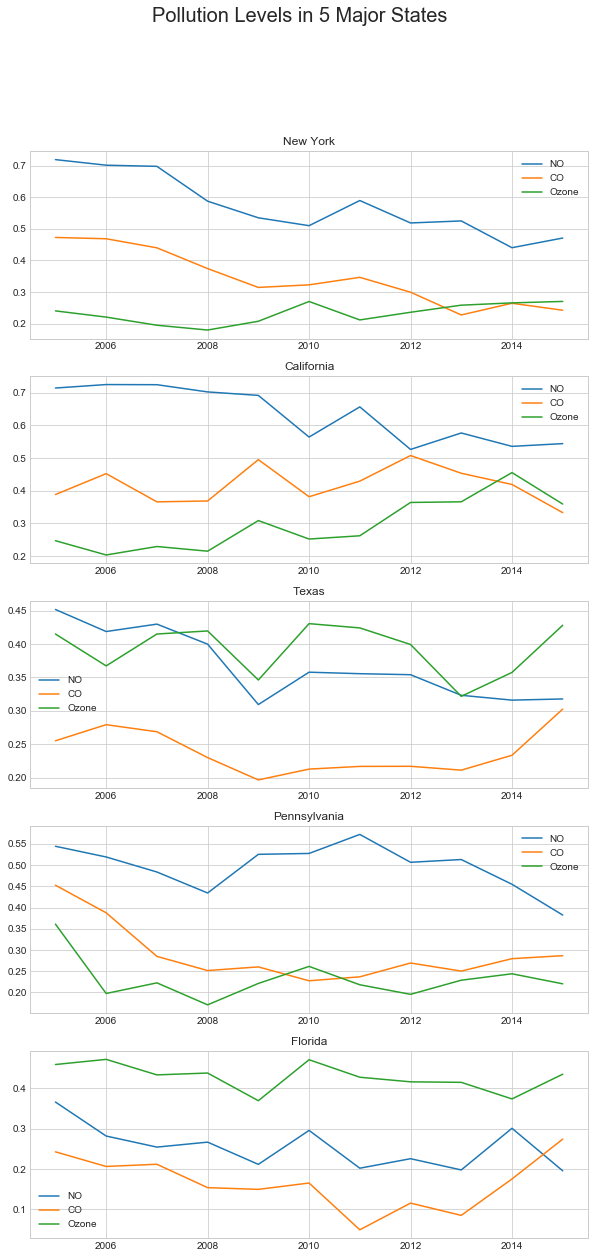

In [5]:
plt.style.use('seaborn-whitegrid')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,figsize=(10,20))

fig.suptitle('Pollution Levels in 5 Major States',fontsize=20)

x1 = data_NY['Year']
y1 = data_NY[['NO','CO','Ozone']]
ax1.plot(x1,y1)
ax1.title.set_text('New York')
ax1.legend(['NO','CO','Ozone'])

x2 = data_Cal['Year']
y2 = data_Cal[['NO','CO','Ozone']]
ax2.plot(x2,y2)
ax2.title.set_text('California')
ax2.legend(['NO','CO','Ozone'])

x3 = data_Tex['Year']
y3 = data_Tex[['NO','CO','Ozone']]
ax3.plot(x3,y3)
ax3.title.set_text('Texas')
ax3.legend(['NO','CO','Ozone'])

x4 = data_Penn['Year']
y4 = data_Penn[['NO','CO','Ozone']]
ax4.plot(x4,y4)
ax4.title.set_text('Pennsylvania')
ax4.legend(['NO','CO','Ozone'])

x5 = data_Flo['Year']
y5 = data_Flo[['NO','CO','Ozone']]
ax5.plot(x5,y5)
ax5.title.set_text('Florida')
ax5.legend(['NO','CO','Ozone'])

plt.show()

## <span style='font-family:Georgia'> Trends in 5 major states: 

### <span style='font-family:Georgia'>New York:
<span style='font-family:Georgia'>NO is the highest, followed by CO and the Ozone. 
    
<span style='font-family:Georgia'>-CO:Levels have shown a consistent decrease over the years
    
<span style='font-family:Georgia'>-NO:Levels have reduced by over 0.2 points over the years 
    
<span style='font-family:Georgia'>-Ozone:Have slightly increased from 2006 to 2014 
    
### <span style='font-family:Georgia'>California:
<span style='font-family:Georgia'>NO is the highest, followed by CO and the Ozone.
    
<span style='font-family:Georgia'>-CO:Have shown ups and downs but reduced in the past 2 years 
    
<span style='font-family:Georgia'>-NO:Levels have reduced by around 1.5 points over the years 
    
<span style='font-family:Georgia'>-Ozone:Levels have increased after 2011, but fell in 2014 after reaching the peak 
    
### <span style='font-family:Georgia'>Texas - 
<span style='font-family:Georgia'>Ozone is the highest, followed by NO and the CO.
    
<span style='font-family:Georgia'>-CO:They were consistently low, but rose in 2014 
    
<span style='font-family:Georgia'>-NO:Levels fell over the years
    
<span style='font-family:Georgia'>-Ozone:Have shown ups and downs over the past years and rose after 2013
    
### <span style='font-family:Georgia'>Pennsylvania - 
<span style='font-family:Georgia'>NO is the highest, followed by CO and the Ozone.
    
<span style='font-family:Georgia'>-CO:The tren is consistently reducing levels and a slight increase after 2013
    
<span style='font-family:Georgia'>-NO:The levels have reduced after 2011 by more than 0.2 points 
    
<span style='font-family:Georgia'>-Ozone:There is a sharp drop after 2005
    
### <span style='font-family:Georgia'>Florida - 
<span style='font-family:Georgia'>Ozone is the highest, followed by NO and the CO.
    
<span style='font-family:Georgia'>-CO:Levels have increased from 2011 and surpassed NO emissions after 2014 
    
<span style='font-family:Georgia'>-NO:Has shown may ups and downs and sharply reduced from 2014 to 2015
    
<span style='font-family:Georgia'>-Ozone:Not a lot of changes in the levels over the years, around 0.1 points change 

## <span style='font-family:Georgia'> <span style='color:Brown'>  CHANGES IN ENERGY SOURCES IN 5 MAJOR STATES OVER TIME 

In [13]:
df2 = Final 

In [16]:
df2['NonRenewable']=df2[['Natural Gas','Coal','Nuclear','Petroleum']].sum(axis=1)
df2['PRenewable'] = df2['Renewable']/(df2['Renewable']+df2['NonRenewable'])

In [14]:
df2 ['Renewable']=df2[['Geothermal','Hydroelectric Conventional','Solar Thermal and Photovoltaic','Wind','Wood and Wood Derived Fuels']].sum(axis=1)

In [17]:
df2 = df2.fillna(0)
df2 = df2.loc[df2['Quarter']==4]
df2_NY = df2.loc[df2['State']=='New York']
df2_Cal = df2.loc[df2['State']=='California'] 
df2_Tex = df2.loc[df2['State']=='Texas'] 
df2_Flo = df2.loc[df2['State']=='Florida'] 
df2_Penn = df2.loc[df2['State']=='Pennsylvania'] 

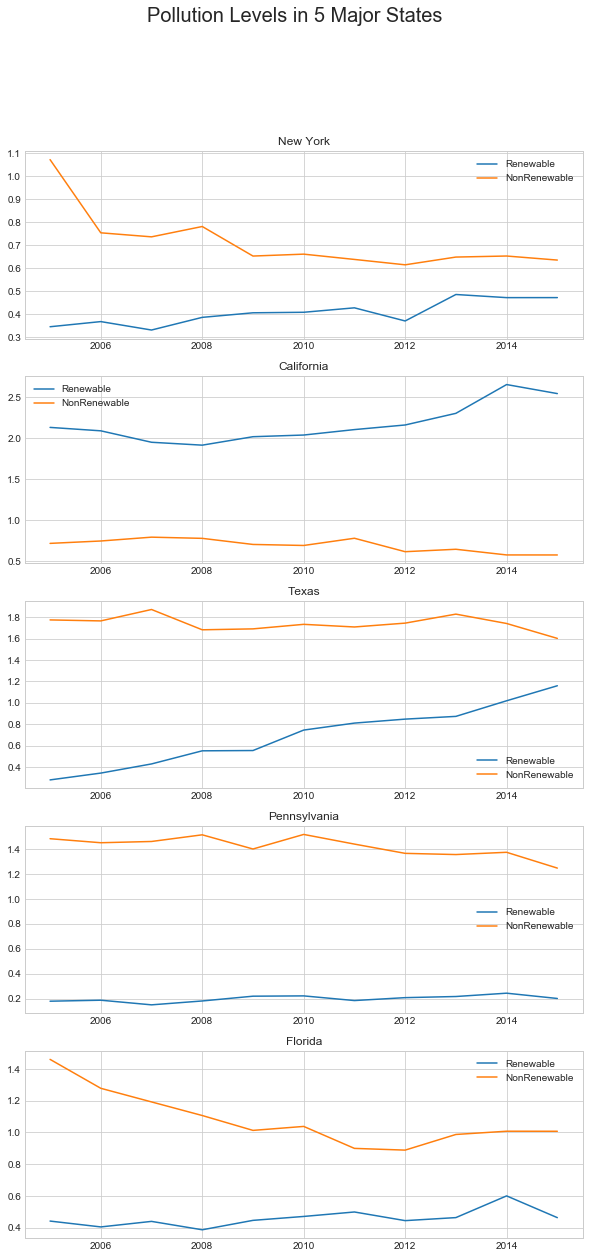

In [18]:
plt.style.use('seaborn-whitegrid')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,figsize=(10,20))

fig.suptitle('Pollution Levels in 5 Major States',fontsize=20)


x1 = df2_NY['Year']
y1 = df2_NY[['Renewable','NonRenewable']]
ax1.plot(x1,y1)
ax1.title.set_text('New York')
ax1.legend(['Renewable','NonRenewable'])

x2 = df2_Cal['Year']
y2 = df2_Cal[['Renewable','NonRenewable']]
ax2.plot(x2,y2)
ax2.title.set_text('California')
ax2.legend(['Renewable','NonRenewable'])

x3 = df2_Tex['Year']
y3 = df2_Tex[['Renewable','NonRenewable']]
ax3.plot(x3,y3)
ax3.title.set_text('Texas')
ax3.legend(['Renewable','NonRenewable'])

x4 = df2_Penn['Year']
y4 = df2_Penn[['Renewable','NonRenewable']]
ax4.plot(x4,y4)
ax4.title.set_text('Pennsylvania')
ax4.legend(['Renewable','NonRenewable'])

x5 = df2_Flo['Year']
y5 = df2_Flo[['Renewable','NonRenewable']]
ax5.plot(x5,y5)
ax5.title.set_text('Florida')
ax5.legend(['Renewable','NonRenewable'])

plt.show()

## <span style='font-family:Georgia'> Trends in 5 major states: 

### <span style='font-family:Georgia'>New York:
<span style='font-family:Georgia'>Non-Renewable energy is used more than Renewable energy
    
<span style='font-family:Georgia'>-Renewable:The use of Renewable energy has increased by a very small amount
    
<span style='font-family:Georgia'>-Non-Renewable:The use of Non-Renewable energy has reduced drastically after 2005

### <span style='font-family:Georgia'>California:
<span style='font-family:Georgia'>Renewable energy is used more than Non-Renewable energy
    
<span style='font-family:Georgia'>-Renewable:The use has remained almost the same, with a slight increase after 2013
    
<span style='font-family:Georgia'>-Non-Renewable:The levels have remained the same
    
### <span style='font-family:Georgia'>Texas - 
<span style='font-family:Georgia'>Non-Renewable energy is used more than Renewable energy
    
<span style='font-family:Georgia'>-Renewable:The use of renewable energy showed an upward trend
    
<span style='font-family:Georgia'>-Non-Renewable:No a lot of changes are observed 
    
### <span style='font-family:Georgia'>Pennsylvania - 
<span style='font-family:Georgia'>Non-Renewable energy is used more than Renewable energy
    
<span style='font-family:Georgia'>-Renewable:Not a lot of changes 
    
<span style='font-family:Georgia'>-Non-Renewable:Not a lot of changes are observed 
    
### <span style='font-family:Georgia'>Florida - 
<span style='font-family:Georgia'>Non-Renewable energy is used more than Renewable energy
    
<span style='font-family:Georgia'>-Renewable:There is a major fall from 2005 to 2010 and then the levels are almost constant
    
<span style='font-family:Georgia'>-Non-Renewable: Almost the same levels throughout 

## <span style='font-family:Georgia'> <span style='color:Brown'>  CORRELATIONS

In [36]:
df_cor = Final.drop(['Unnamed: 0', 'State', 'Year', 'Quarter','PRenewable'],axis=1)
cor = df_cor.corr()
result = cor[['CO','NO','Ozone']]
result

,CO,NO,Ozone
Ozone,-0.189332,-0.383092,1.000000
Population,-0.071812,0.314657,-0.201914
GDP,-0.055108,0.346212,-0.203049
CO,1.000000,0.426732,-0.189332
NO,0.426732,1.000000,-0.383092
Coal,0.018963,0.152926,0.018627
Geothermal,-0.029769,0.430523,-0.160789
Hydroelectric Conventional,-0.011411,0.143831,-0.242670
Natural Gas,-0.126638,0.047571,-0.130601
Nuclear,0.106274,0.269749,-0.095394


#### <span style='font-family:Georgia'> The correlations between CO,NO and Ozone can be seen in the graph above and they are also better depicted in the heatmap below. 

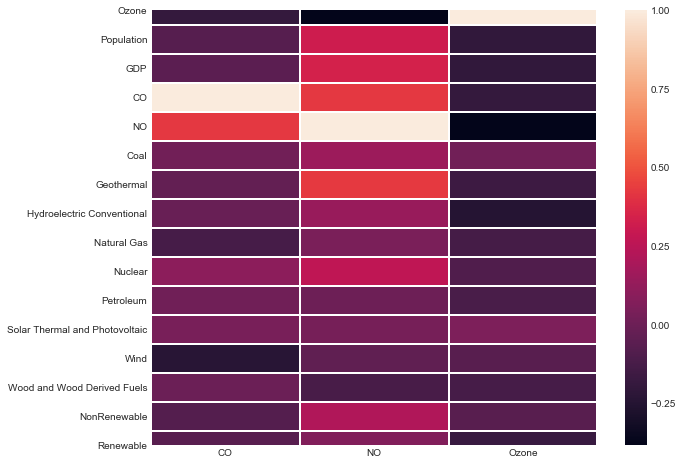

In [30]:
fig,ax = plt.subplots(figsize=(10,8))         
ax = sns.heatmap(result, linewidths=1, ax=ax)

In [18]:
df3 = Final

In [20]:
df3.columns

Index(['Unnamed: 0', 'State', 'Year', 'Quarter', 'Ozone', 'Population', 'GDP',
       'CO', 'NO', 'Coal', 'Geothermal', 'Hydroelectric Conventional',
       'Natural Gas', 'Nuclear', 'Petroleum', 'Solar Thermal and Photovoltaic',
       'Wind', 'Wood and Wood Derived Fuels', 'Renewable', 'NonRenewable',
       'PRenewable'],
      dtype='object')

In [38]:
result3 = pd.pivot_table(df3,index=['Year'],
               values=['Ozone', 'CO', 'NO', 'Coal', 'Geothermal', 'Hydroelectric Conventional',
                        'Natural Gas', 'Nuclear', 'Petroleum', 'Solar Thermal and Photovoltaic',
                        'Wind', 'Wood and Wood Derived Fuels','Renewable', 'NonRenewable'],
               aggfunc=np.sum)
result3.columns
pollutants = result3[['CO','NO','Ozone']]
renewable = result3[['Geothermal', 'Hydroelectric Conventional',
                         'Solar Thermal and Photovoltaic',
                        'Wind', 'Wood and Wood Derived Fuels']]
nonrenewable = result3[['Coal','Natural Gas', 'Nuclear', 'Petroleum']]

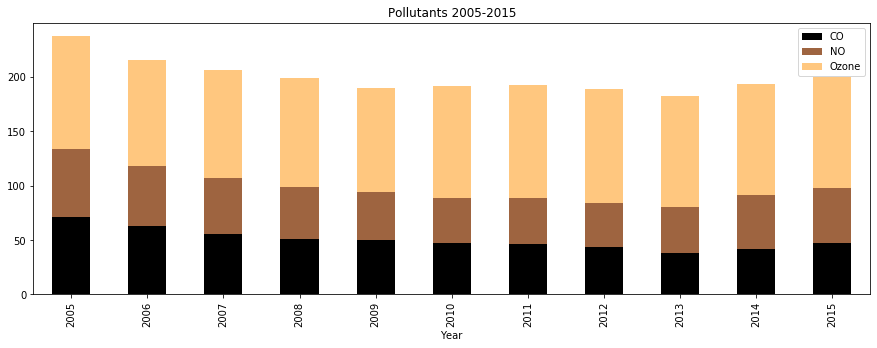

In [39]:
fig,ax = plt.subplots()
pollutants.plot.bar(ax=ax,stacked=True,figsize=(15,5),title='Pollutants 2005-2015',cmap='copper')

#### <span style='font-family:Georgia'> The Ozone levels are higher when compared to CO and NO, which are almost the same. In the above graph we can see that amongst the pollutants, CO and NO have reduced until 2013 and then we see a slight increase. Ozone levels have remained nearly constant. Thus there is an almost U shape being formed at the peaks. 

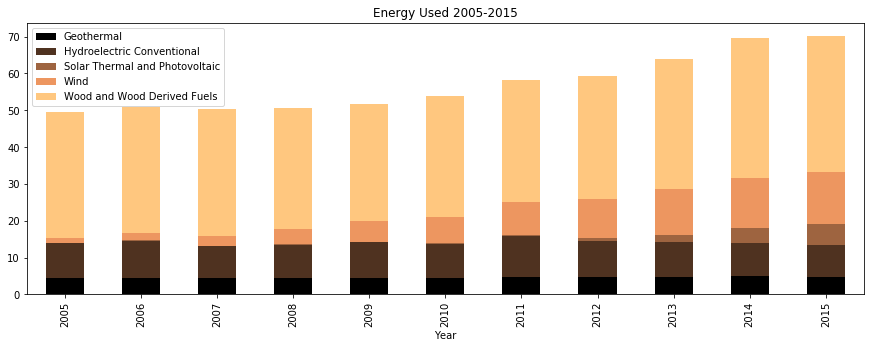

In [40]:
fig,ax = plt.subplots()
renewable.plot.bar(ax=ax,stacked=True,figsize=(15,5),title='Energy Used 2005-2015',cmap='copper')

#### <span style='font-family:Georgia'> Overall the use of renewable energy to generate electricity has been increasing. The contribution of Wood to generate electricity is the highest, followed by Wind, and then Hydroelectric, Geothermal and finally Solar. Significant changes are observed in Wind and Solar energy, Wind has been increasing over the years and we see an increased usage of Solar energy from 2012. The usage of the other energies has not seen a lot of change. 

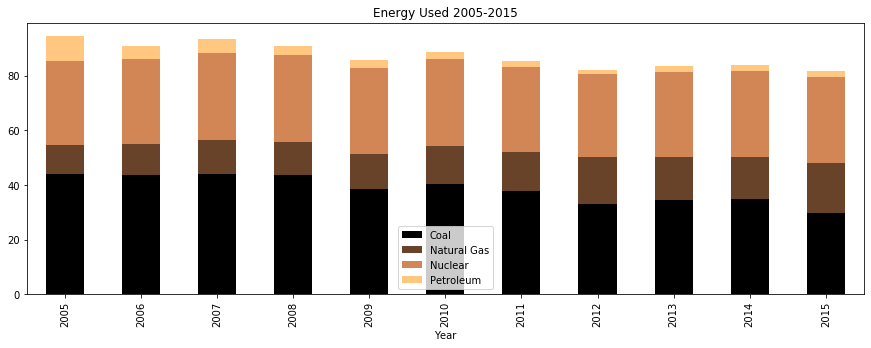

In [37]:
fig,ax = plt.subplots()
nonrenewable.plot.bar(ax=ax,stacked=True,figsize=(15,5),title='Energy Used 2005-2015',cmap='copper')

#### <span style='font-family:Georgia'> Overall the use of non-renewable energy has been decreasing. The contribution of Coal to generate electricity is the highest in every year but 2015(Nuclear is the highest). Nuclear is used the most after Coal, Natural Gas is next, and Petroleum is used the least. Significant changes are observed in Petroleum and Coal, usage of both has reduced. Natural gas and Nuclear energy usage are almost the same over the years. 

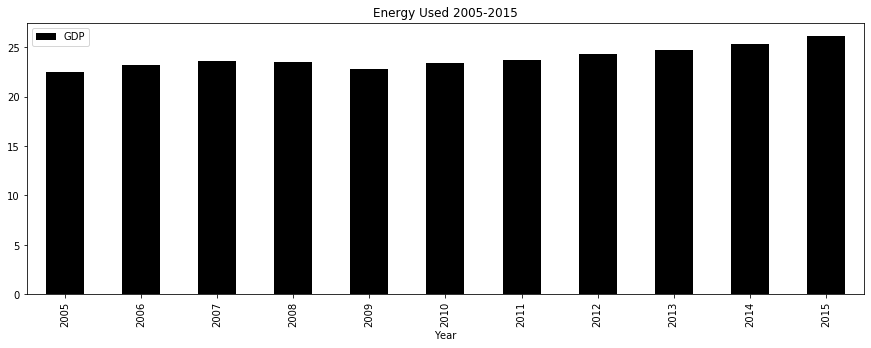

In [50]:
fig,ax = plt.subplots()
gdp.plot.bar(ax=ax,figsize=(15,5),title='Energy Used 2005-2015',cmap='copper')

#### <span style='font-family:Georgia'>We can see that the GDP has been increasing over the years in all the states of the U.S. Thus along with a reduction in pollutants, decrease in the use of non-renewable energy, increase in the use of renewable energy and the increase in the GDP levels, shows evidence that the EKC model should work. 

#### <span style='font-family:Georgia'> <span style='color:Blue'> <h1><center>PART V - REGRESSION ANALYSIS</center></h1>  

## <span style='font-family:Georgia'> <span style='color:Brown'>HYPOTHESIS

 <span style='font-family:Georgia'>In our model, we propose that population level would be inversely related to environmental degradation. This stems from the fact that increase in population causes an increase in energy consumption which in turn leads to environmental degradation. We propose that the coefficient of renewable energy consumption will essentially be negative. There is a substitutability between renewable energy and nonrenewable energy as following an increase in renewable energy consumption, consumption of nonrenewable energy, which is the primary source of environmental degradation, will eventually decrease. 



## <span style='font-family:Georgia'> <span style='color:Brown'>ECONOMETRIC MODEL

 <span style='font-family:Georgia'>We set up our data as panel data in order to conduct linear regression to understand the relationship between environmental degradation and economic development in American states. 

 <span style='font-family:Georgia'>Given the 50 states plus the District of Columbia and Puerto Rico, we have 52 entities and we are considering quarterly data for 10 years. Therefore, for our models
N = 52 and T = 44 

 <span style='font-family:Georgia'>We use three panel regressions with CO being the dependent variable in the first case, NO being the dependent variable in the second case, O3 being the dependent variable in the third case. 


#### CO Levels = β0 + β1GDP + β2GDPsq + β3Population + β4Renewable Energy Consumption + β5Non-Renewable Energy Consumption + εt 

#### NO Levels = β0 + β1GDP + β2GDPsq + β3Population + β4Renewable Energy Consumption + β5Non-Renewable Energy Consumption + εt 

#### O3 Levels = β0 + β1GDP + β2GDPsq + β3Population + β4Renewable Energy Consumption + β5Non-Renewable Energy Consumption + εt 




#### <span style='font-family:Georgia'> <span style='color:Blue'> <h1><center>PART VI - RESULTS</center></h1>   

## <span style='font-family:Georgia'> <span style='color:Brown'> STEP 1: CLEANING THE DATA

#### <span style='font-family:Georgia'>For the purpose of performing the regression, we already normalized the values of each variable. Hence, the effect of one variable to another can now be measured regardless of their unit of measurement. 

In [3]:
df = pd.read_excel('/Users/leolie/Desktop/Data Bootcamp/PROJECT/Final_last.xlsx')
df = df.drop(df.columns[0],axis=1).sort_values(by=['State','Year','Quarter']) #month data seem weried here
df.head()

#Comments: Here we show the first 5 rows as a preview of our dataset.

,State,Year,Quarter,Ozone,Population,GDP,CO,NO,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Petroleum,Solar,Wind,Wood
0,Alabama,2005,1,0.389725,0.093963,0.063262,0.525890,0.110632,0.414826,NaN,0.116493,0.031830,0.317975,0.006628,NaN,NaN,0.830276
1,Alabama,2005,2,0.517361,0.094768,0.064097,0.444492,NaN,0.397626,NaN,0.089955,0.040879,0.314345,0.005084,NaN,NaN,0.793504
2,Alabama,2005,3,0.399372,0.095579,0.064064,0.433854,NaN,0.469415,NaN,0.086705,0.078451,0.331959,0.006243,NaN,NaN,0.780541
3,Alabama,2005,4,0.343001,0.096396,0.064988,0.652944,NaN,0.430172,NaN,0.063511,0.040161,0.286980,0.007482,NaN,NaN,0.795242
4,Alabama,2006,1,0.399723,0.097220,0.065138,0.641946,NaN,0.387014,NaN,0.089784,0.030342,0.301634,0.004535,NaN,NaN,0.849914


#### <span style='font-family:Georgia'>Since the dataset is in panel form, we then created a new column, "Time", which we will use as a time component for the regression.

In [4]:
df['Month'] = df['Quarter']
df['Month'] = np.where((df.Month == 1),1,df.Month)
df['Month'] = np.where((df.Month == 2),4,df.Month)
df['Month'] = np.where((df.Month == 3),7,df.Month)
df['Month'] = np.where((df.Month == 4),10,df.Month)
df

,State,Year,Quarter,Ozone,Population,GDP,CO,NO,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Petroleum,Solar,Wind,Wood,Month
0,Alabama,2005,1,0.389725,0.093963,0.063262,0.525890,0.110632,0.414826,NaN,0.116493,0.031830,0.317975,0.006628,NaN,NaN,0.830276,1
1,Alabama,2005,2,0.517361,0.094768,0.064097,0.444492,NaN,0.397626,NaN,0.089955,0.040879,0.314345,0.005084,NaN,NaN,0.793504,10
2,Alabama,2005,3,0.399372,0.095579,0.064064,0.433854,NaN,0.469415,NaN,0.086705,0.078451,0.331959,0.006243,NaN,NaN,0.780541,7
3,Alabama,2005,4,0.343001,0.096396,0.064988,0.652944,NaN,0.430172,NaN,0.063511,0.040161,0.286980,0.007482,NaN,NaN,0.795242,10
4,Alabama,2006,1,0.399723,0.097220,0.065138,0.641946,NaN,0.387014,NaN,0.089784,0.030342,0.301634,0.004535,NaN,NaN,0.849914,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,Wyoming,2014,4,0.772563,0.002579,0.005339,0.000000,0.098021,0.238661,NaN,0.003094,0.001822,NaN,0.000866,NaN,0.096954,NaN,10
2158,Wyoming,2015,1,0.789969,0.002595,0.005641,0.000000,0.075057,0.237593,NaN,0.003203,0.002098,NaN,0.000880,NaN,0.089581,NaN,1
2159,Wyoming,2015,2,0.912553,0.002613,0.005241,0.000000,0.058492,0.224010,NaN,0.011639,0.002223,NaN,0.000695,NaN,0.049596,NaN,10
2160,Wyoming,2015,3,0.834964,0.002621,0.005485,0.222391,0.079477,0.251775,NaN,0.012043,0.002911,NaN,0.001114,NaN,0.049833,NaN,7


In [5]:
d = df['Year'].astype(str)+'-'+df['Month'].astype(str)
q = pd.to_datetime(d.values,format='%Y-%m')
q

DatetimeIndex(['2005-01-01', '2005-10-01', '2005-07-01', '2005-10-01',
               '2006-01-01', '2006-10-01', '2006-07-01', '2006-10-01',
               '2007-01-01', '2007-10-01',
               ...
               '2013-07-01', '2013-10-01', '2014-01-01', '2014-10-01',
               '2014-07-01', '2014-10-01', '2015-01-01', '2015-10-01',
               '2015-07-01', '2015-10-01'],
              dtype='datetime64[ns]', length=2288, freq=None)

In [6]:
df['Time'] = q
df

,State,Year,Quarter,Ozone,Population,GDP,CO,NO,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Petroleum,Solar,Wind,Wood,Month,Time
0,Alabama,2005,1,0.389725,0.093963,0.063262,0.525890,0.110632,0.414826,NaN,0.116493,0.031830,0.317975,0.006628,NaN,NaN,0.830276,1,2005-01-01
1,Alabama,2005,2,0.517361,0.094768,0.064097,0.444492,NaN,0.397626,NaN,0.089955,0.040879,0.314345,0.005084,NaN,NaN,0.793504,10,2005-10-01
2,Alabama,2005,3,0.399372,0.095579,0.064064,0.433854,NaN,0.469415,NaN,0.086705,0.078451,0.331959,0.006243,NaN,NaN,0.780541,7,2005-07-01
3,Alabama,2005,4,0.343001,0.096396,0.064988,0.652944,NaN,0.430172,NaN,0.063511,0.040161,0.286980,0.007482,NaN,NaN,0.795242,10,2005-10-01
4,Alabama,2006,1,0.399723,0.097220,0.065138,0.641946,NaN,0.387014,NaN,0.089784,0.030342,0.301634,0.004535,NaN,NaN,0.849914,1,2006-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,Wyoming,2014,4,0.772563,0.002579,0.005339,0.000000,0.098021,0.238661,NaN,0.003094,0.001822,NaN,0.000866,NaN,0.096954,NaN,10,2014-10-01
2158,Wyoming,2015,1,0.789969,0.002595,0.005641,0.000000,0.075057,0.237593,NaN,0.003203,0.002098,NaN,0.000880,NaN,0.089581,NaN,1,2015-01-01
2159,Wyoming,2015,2,0.912553,0.002613,0.005241,0.000000,0.058492,0.224010,NaN,0.011639,0.002223,NaN,0.000695,NaN,0.049596,NaN,10,2015-10-01
2160,Wyoming,2015,3,0.834964,0.002621,0.005485,0.222391,0.079477,0.251775,NaN,0.012043,0.002911,NaN,0.001114,NaN,0.049833,NaN,7,2015-07-01


#### <span style='font-family:Georgia'>We also created a new variable column, 'GDPsq', which will be the variable that determines the turning point of the EKC model. 

In [7]:
df['GDPsq']=df['GDP']*df['GDP']

Considering that several states don't have values for some energies in particular years, we have to fill up the null values with zeroes

In [9]:
df = df.fillna(0)
df

,State,Year,Quarter,Ozone,Population,GDP,CO,NO,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Petroleum,Solar,Wind,Wood,Month,Time,GDPsq
0,Alabama,2005,1,0.389725,0.093963,0.063262,0.525890,0.110632,0.414826,0.0,0.116493,0.031830,0.317975,0.006628,0.0,0.000000,0.830276,1,2005-01-01,0.004002
1,Alabama,2005,2,0.517361,0.094768,0.064097,0.444492,0.000000,0.397626,0.0,0.089955,0.040879,0.314345,0.005084,0.0,0.000000,0.793504,10,2005-10-01,0.004108
2,Alabama,2005,3,0.399372,0.095579,0.064064,0.433854,0.000000,0.469415,0.0,0.086705,0.078451,0.331959,0.006243,0.0,0.000000,0.780541,7,2005-07-01,0.004104
3,Alabama,2005,4,0.343001,0.096396,0.064988,0.652944,0.000000,0.430172,0.0,0.063511,0.040161,0.286980,0.007482,0.0,0.000000,0.795242,10,2005-10-01,0.004223
4,Alabama,2006,1,0.399723,0.097220,0.065138,0.641946,0.000000,0.387014,0.0,0.089784,0.030342,0.301634,0.004535,0.0,0.000000,0.849914,1,2006-01-01,0.004243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,Wyoming,2014,4,0.772563,0.002579,0.005339,0.000000,0.098021,0.238661,0.0,0.003094,0.001822,0.000000,0.000866,0.0,0.096954,0.000000,10,2014-10-01,0.000029
2158,Wyoming,2015,1,0.789969,0.002595,0.005641,0.000000,0.075057,0.237593,0.0,0.003203,0.002098,0.000000,0.000880,0.0,0.089581,0.000000,1,2015-01-01,0.000032
2159,Wyoming,2015,2,0.912553,0.002613,0.005241,0.000000,0.058492,0.224010,0.0,0.011639,0.002223,0.000000,0.000695,0.0,0.049596,0.000000,10,2015-10-01,0.000027
2160,Wyoming,2015,3,0.834964,0.002621,0.005485,0.222391,0.079477,0.251775,0.0,0.012043,0.002911,0.000000,0.001114,0.0,0.049833,0.000000,7,2015-07-01,0.000030


#### <span style='font-family:Georgia'>In order to do a panel regression, one of the criteria that makes regression go smoothly is the balanced panel dataset, so we just have to check if it is balanced.

In [10]:
df.groupby(['State'])['Year'].count()

#Comments: So, it's balanced panel data set. We should be good to proceed for the regression.

State
Alabama                 44
Alaska                  44
Arizona                 44
Arkansas                44
California              44
Colorado                44
Connecticut             44
Delaware                44
District Of Columbia    44
Florida                 44
Georgia                 44
Hawaii                  44
Idaho                   44
Illinois                44
Indiana                 44
Iowa                    44
Kansas                  44
Kentucky                44
Louisiana               44
Maine                   44
Maryland                44
Massachusetts           44
Michigan                44
Minnesota               44
Mississippi             44
Missouri                44
Montana                 44
Nebraska                44
Nevada                  44
New Hampshire           44
New Jersey              44
New Mexico              44
New York                44
North Carolina          44
North Dakota            44
Ohio                    44
Oklahoma              

#### <span style='font-family:Georgia'>Lastly, we make column "State" and "Time" the indices of the dataset.

In [11]:
Year = pd.Categorical(df.Year)
df = df.set_index(['State','Time'])
df.head()

Year  Quarter     Ozone  Population       GDP        CO  \
State   Time                                                                  
Alabama 2005-01-01  2005        1  0.389725    0.093963  0.063262  0.525890   
        2005-10-01  2005        2  0.517361    0.094768  0.064097  0.444492   
        2005-07-01  2005        3  0.399372    0.095579  0.064064  0.433854   
        2005-10-01  2005        4  0.343001    0.096396  0.064988  0.652944   
        2006-01-01  2006        1  0.399723    0.097220  0.065138  0.641946   

                          NO      Coal  Geothermal  \
State   Time                                         
Alabama 2005-01-01  0.110632  0.414826         0.0   
        2005-10-01  0.000000  0.397626         0.0   
        2005-07-01  0.000000  0.469415         0.0   
        2005-10-01  0.000000  0.430172         0.0   
        2006-01-01  0.000000  0.387014         0.0   

                    Hydroelectric Conventional  Natural Gas   Nuclear  \
State   Time                                                            
Alabama 2005-01-01                    0.116493     0.031830  0.317975   
        2005-10-01                    0.089955     0.040879  0.314345   
        2005-07-01                    0.086705     0.078451  0.331959   
        2005-10-01                    0.063511     0.040161  0.286980   
        2006-01-01                    0.089784     0.030342  0.301634   

                    Petroleum  Solar  Wind      Wood  Month     GDPsq  
State   Time                                                           
Alabama 2005-01-01   0.006628    0.0   0.0  0.830276      1  0.004002  
        2005-10-01   0.005084    0.0   0.0  0.793504     10  0.004108  
        2005-07-01   0.006243    0.0   0.0  0.780541      7  0.004104  
        2005-10-01   0.007482    0.0   0.0  0.795242     10  0.004223  
        2006-01-01   0.004535    0.0   0.0  0.849914      1  0.004243

## <span style='font-family:Georgia'> <span style='color:Brown'> STEP 2: REGRESSION

#### <span style='font-family:Georgia'>Again, we check the correlation between variables that we're interested in to see the preview of their expected relationships to each other.

In [18]:
Corr = df.drop(['Year','Quarter','Month'],axis=1).corr()
Corr

,Ozone,Population,GDP,CO,NO,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Petroleum,Solar,Wind,Wood,GDPsq
Ozone,1.000000,-0.056896,-0.063134,-0.149901,-0.154055,0.098085,-0.042441,-0.155177,-0.007435,-0.021780,-0.043239,0.026229,-0.011354,-0.067447,-0.072302
Population,-0.056896,1.000000,0.985405,0.047596,0.339856,0.362879,0.625972,0.243015,0.764538,0.553560,0.209877,0.375103,0.434935,0.427797,0.885462
GDP,-0.063134,0.985405,1.000000,0.064050,0.360634,0.284580,0.655817,0.276258,0.723350,0.527504,0.202057,0.397401,0.440643,0.381454,0.919677
CO,-0.149901,0.047596,0.064050,1.000000,0.308665,0.053856,0.087717,0.066429,-0.026388,-0.034233,0.052504,0.036008,-0.084688,-0.096123,0.059222
NO,-0.154055,0.339856,0.360634,0.308665,1.000000,0.134534,0.171553,0.010635,0.137861,0.277648,0.056399,0.095083,0.069885,-0.048003,0.269170
Coal,0.098085,0.362879,0.284580,0.053856,0.134534,1.000000,-0.146428,-0.195470,0.320627,0.444252,0.060108,-0.069269,0.277357,0.035727,0.080818
Geothermal,-0.042441,0.625972,0.655817,0.087717,0.171553,-0.146428,1.000000,0.256223,0.349047,0.066423,0.013054,0.505568,0.170513,0.363773,0.849144
Hydroelectric Conventional,-0.155177,0.243015,0.276258,0.066429,0.010635,-0.195470,0.256223,1.000000,0.071065,0.015351,-0.015516,0.079791,0.126391,0.214468,0.273937
Natural Gas,-0.007435,0.764538,0.723350,-0.026388,0.137861,0.320627,0.349047,0.071065,1.000000,0.334118,0.222120,0.229705,0.520540,0.375349,0.646016
Nuclear,-0.021780,0.553560,0.527504,-0.034233,0.277648,0.444252,0.066423,0.015351,0.334118,1.000000,0.088177,0.041387,0.123326,0.309189,0.300738


#### <span style='font-family:Georgia'>Now, for the regression part, we opted to use Pooled OLS to estimate the EKC model. We also previously tried to apply Random Effects, but we determined that the results are not as descriptive as the Pooled OLS in terms of R-squared, signs of coefficients, p-values, and F-statistics.

In [19]:
#1. Regression on CO
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
x_var = df[['GDP', 'GDPsq','Population','Coal','Natural Gas', 'Nuclear','Petroleum','Geothermal', 'Hydroelectric Conventional','Solar', 'Wind', 'Wood']] #I didn't find var PRenewable
y = df['CO']
x = sm.add_constant(x_var)
model = PooledOLS(y,x)
pooled_res = model.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                     CO   R-squared:                        0.0860
Estimator:                  PooledOLS   R-squared (Between):              0.1516
No. Observations:                2288   R-squared (Within):               0.0188
Date:                Tue, May 12 2020   R-squared (Overall):              0.0860
Time:                        07:57:10   Log-likelihood                    828.75
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.843
Entities:                          52   P-value                           0.0000
Avg Obs:                       44.000   Distribution:                 F(12,2275)
Min Obs:                       44.000                                           
Max Obs:                       44.000   F-statistic (robust):             17.843
                            

/Users/leolie/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<span style='font-family:Georgia'>Based on the regression results, we can see that the R-squared is 0.0860, which is not that strong. This indicates that the independent variables may not be proper choices to explain what happens in CO. On the other hand, looking at the p-values, majority of independent variables are statistically significant at 5% level of significance, except for Natural Gas, Petroleum, and Solar. We conclude that these three do not significantly affect the CO.

<span style='font-family:Georgia'>In terms of signs of coefficients of the energy sources, we previously made an assumption that the consumption of Renewable Energies supposedly decrease the amount of CO, while the consumption of NonRenewable Energies do the otherwise. Yet, we can see here that some of them have signs of coefficients opposite of what we expected. For instance, Nuclear power as NonRenewable Energy source negatively impacts the CO. One way to think of it is that, due to its complex nature, Nuclear power is usually considered another Non-Renewable Energy as its production involves the use of Non-Renewable materials, even though the Nuclear energy itself is renewable. Nuclear energy itself is always touted as one of the lowest carbon-produced energy, so the negative sign of coefficient may reflect on this complex nature. Other odd findings include Geothermal and Hydroelectric Conventional, two renewable energy sources that are supposedly carbon-friendly. Although Geothermal energy is known for producing low carbon dioxide, it is odd to see such a high coefficient in comparison to other energy sources, especially for CO. Hydroelectric conventional is also known for not producing carbon emissions (if it is, the amount is supposedly very little) in its consumption. Therefore, we believe that their oddities might be due to either the nature of our dataset or that their plants' construction and maintenance produce high enough carbon.

<span style='font-family:Georgia'>An odd occurence also happens in the independent variable Population, in which the sign of coefficient is negative and has a considerably high number in comparison to other independent variables. Logically, as population increases, the amount of pollutant also increases as there will be more emissions from more energy usage, but not if we look at this model. Perhaps CO emission doesn't work like CO2 from population perspective? How about the use of motorized vehicles that surely accounts for a high CO emission? Regardless of many possibilities, we also think that incorporating population as an independent variable in the model may not be that accurate considering that we already have GDP and by standardizing the GDP it also works as GDP per Capita, which we usually use in regression.

<span style='font-family:Georgia'>Finally, the coefficient signs of GDP and GDPsq, including their low p-values, show what we expect of the EKC model. As level of state's GDP increases, the level of CO increases. After a period of growth in GDP, there will be a decrease in CO as the state becomes increasingly aware of its negative impact to the environment, which is shown in the negative sign of coefficient for GDPsq. In short, the model at least represents our hypothetical EKC model.

In [20]:
#2. Regression on NO
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
x_var = df[['GDP', 'GDPsq','Population','Coal','Natural Gas', 'Nuclear','Petroleum','Geothermal', 'Hydroelectric Conventional','Solar', 'Wind', 'Wood']] #I didn't find var PRenewable
y = df['NO']
x = sm.add_constant(x_var)
model = PooledOLS(y,x)
pooled_res = model.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                     NO   R-squared:                        0.2398
Estimator:                  PooledOLS   R-squared (Between):              0.3565
No. Observations:                2288   R-squared (Within):               0.0158
Date:                Tue, May 12 2020   R-squared (Overall):              0.2398
Time:                        09:55:30   Log-likelihood                    810.76
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      59.818
Entities:                          52   P-value                           0.0000
Avg Obs:                       44.000   Distribution:                 F(12,2275)
Min Obs:                       44.000                                           
Max Obs:                       44.000   F-statistic (robust):             59.818
                            

<span style='font-family:Georgia'>Looking at the regression results above, the R-squared is 0.2398, which is actually quite good for panel data, indiciating that the independent variables do explain NO. Moreover, majority of independent variables (with the exception of Coal, Nuclear, Petroleum, and Solar) have p-values less than 0.05 at 5% level of significance. Interestingly, Coal and Petroleum, two of the most significant producers of NO appear to show insignificant relationsip with NO in this model, while also show negative coefficient signs (not matching the scientific theory).

<span style='font-family:Georgia'>In analyzing the coefficient signs of the energy sources, again we take into account how the Renewable Energy category is supposed to decrease NO, while its NonRenewable counterpart is expected to do otherwise. Interesting occurences happen to Natural Gas and Geothermal with their coefficient signs are different from expectation. For Natural Gas, the negative coefficient sign and its high number in comparison to other energy sources indicate its negative impacts on NO. This contradicts Natural Gas in general. On the opposite, Geothermal, which is known for producing none to almost none of NO, appears to have significant positive impact on NO. The discrepancies of the way these two variables act towards the level of NO might be contributed to our own dataset.

<span style='font-family:Georgia'>Once again, similar to regression on CO, Population shows a negative relationship with NO. Other than that, the regression satisfies the EKC model similar to what happen in the regression on CO based on the coefficients of GDP and GDPsq.

In [22]:
#3. Regression on Ozone
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
x_var = df[['GDP', 'GDPsq','Population','Coal','Natural Gas', 'Nuclear','Petroleum','Geothermal', 'Hydroelectric Conventional','Solar', 'Wind', 'Wood']] #I didn't find var PRenewable
y = df['Ozone']
x = sm.add_constant(x_var)
model = PooledOLS(y,x)
pooled_res = model.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  Ozone   R-squared:                        0.0611
Estimator:                  PooledOLS   R-squared (Between):              0.1635
No. Observations:                2288   R-squared (Within):               0.0029
Date:                Tue, May 12 2020   R-squared (Overall):              0.0611
Time:                        10:22:29   Log-likelihood                    523.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      12.338
Entities:                          52   P-value                           0.0000
Avg Obs:                       44.000   Distribution:                 F(12,2275)
Min Obs:                       44.000                                           
Max Obs:                       44.000   F-statistic (robust):             12.338
                            

<span style='font-family:Georgia'>Regression on Ozone shows an R-squared of 0.0611, which is lower than the ones for CO and NO. As a result, tne independent variables here may not explain Ozone well enough. Still, most of the independent variables here, except Nuclear, Petroleum, Wind, and Wood, have p-values less than 0.05, so they appear to have some significant impact on Ozone.

<span style='font-family:Georgia'>Again, in terms of the coefficient signs of energy sources, Geothermal and Solar provide unique perspectives in which they show high positive coefficients in comparison to other energy sources. As Renewable Energy, both are predicted to reduce Ozone, but here we see the opposite. Perhaps, there are some unseen side effects from the construction and maintenance of both energies' power plants that lead to the increase in Ozone, especially in areas that experienced summer heat waves for solar power plants.

<span style='font-family:Georgia'>Similar to regressions on CO and NO, Population appears to have a significant negative impact on Ozone even though many urban areas with high concentration of population tend to have high level of "bad" ozone. Aside from this, the regression on Ozone confirms our hypothetical EKC based on the coefficient signs of GDP and GDPsq.

#### <span style='font-family:Georgia'> <span style='color:Blue'> <h1><center>PART VII - CONCLUSION</center></h1>   

#### <span style='font-family:Georgia'>Using our dataset, the three regressions essentially confirm the existence of the EKC model in the 52 regions of the United States from 2005 to 2015. The basis of this conclusion lies in the changing signs on the coefficient of GDP (positive) and GDPsq (negative). This validates the basic hypothesis of EKC that the levels of environmental degradation decrease as economic development increases. This holds for all three proxies of environmental degradation in our data (CO, NO, O3). 
    
#### <span style='font-family:Georgia'>It is important to note that while our main hypothesis was verified, we also observed some inconsistencies with the rest of our hypotheses. For instance, the coefficients on certain energy sources with respect to different pollutant levels were not as we expected. One such example as noted in Section VI Step 2 was Geothermal. Given the renewable aspect of this particular source, we were perplexed to see such a high coefficient in comparison to other energy sources, especially for CO. One thing that may explain this occurrence is that energy sources and pollutants have very complex, multi-layered relationships in which concentration of one doesn't always impact the others' in the expected way. This topic can potentially be used for further investigation.
    
#### <span style='font-family:Georgia'>A fact that is worth noting is that the energy sources considered in our data refer not to their total consumption for all purposes in each region but only their consumption in order to generate electricity. The resource endowments of a particular state determine what are the primary source for electricity generation which can be seen in Section III. Perhaps, if we used a different dataset, in which the energy sources are measured in units of total final consumption (not just for electricity generation), we might have seen different results, which we believe may have portrayed the EKC curve more accurately. If we recall from Section III, we can see that the use of Petroleum as Non-Renewable Energy to generate electricity was very low and that made it insignificant in the regressions that we performed. Of course in practice Petroleum is one of the most significant contributors to releasing pollutants and if we had used a dataset where energy sources were measured in terms of total consumption, it is very likely that we would have seen Petroleum to be significant in the regressions.
    
#### <span style='font-family:Georgia'>Overall, we can see that the use of renewable energies to generate electricity in the 52 states of the United States did increase from 2005 to 2015, whereas the use of the non-renewable energies saw a decline during the same period. Therefore, this particular trend clearly matches with the hypothesis of EKC, in which there is an increase in the usage of renewable energy coupled with a reduction in pollution and increase in GDP over time.
